In [13]:
#Zip Davis' format for parameters into one datafile I can use with my code:
import os
import glob
import pandas as pd

def process_sample_files(sample_id='A', input_dir='.', output_prefix='combined'):
    pattern = os.path.join(input_dir, f'params_*_sample{sample_id}.txt')
    files = sorted(glob.glob(pattern))

    if not files:
        print(f"No files found for sample {sample_id}")
        return

    data_dict = {}

    for file_path in files:
        filename = os.path.basename(file_path)
        prefix = 'params_'
        suffix = f'_sample{sample_id}.txt'

        if filename.startswith(prefix) and filename.endswith(suffix):
            # Extract full PARAMETERNAME, including underscores
            param_name = filename[len(prefix):-len(suffix)]

            # Read 1-column data as Series
            data = pd.read_csv(file_path, header=None, delim_whitespace=True)[0]
            data_dict[param_name] = data
        else:
            print(f"Skipping unrecognized file format: {filename}")

    # Create DataFrame from data_dict
    df = pd.DataFrame(data_dict)

    # Create 'RUN' column: 2460 to 2472 inclusive (13 values)
    run_values = pd.Series(range(2460, 2473), name='RUN')
    df.insert(0, 'RUN', run_values)

    # Save to whitespace-delimited .txt file
    output_file = f'{output_prefix}_sample{sample_id}.txt'
    df.to_csv(output_file, sep='\t', index=False)
    print(f"Combined file written to: {output_file}")

# Example usage:
DirectoryActualA = 'C:\\Users\\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_A_actual\\'
process_sample_files(sample_id='A', input_dir=DirectoryActualA)



DirectoryActualA = 'C:\\Users\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_A_actual\\'
DirectoryActualB = 'C:\\Users\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_B_actual\\'
# Example usage
process_sample_files(sample_id='A',input_dir=DirectoryActualA)  # Change to 'B' for sample B


Combined file written to: combined_sampleA.txt
Combined file written to: combined_sampleA.txt


<>:49: SyntaxWarning: invalid escape sequence '\T'
<>:50: SyntaxWarning: invalid escape sequence '\T'
<>:49: SyntaxWarning: invalid escape sequence '\T'
<>:50: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\4071705652.py:49: SyntaxWarning: invalid escape sequence '\T'
  DirectoryActualA = 'C:\\Users\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_A_actual\\'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\4071705652.py:50: SyntaxWarning: invalid escape sequence '\T'
  DirectoryActualB = 'C:\\Users\TXB909\\Documents\\strain-cell\\PPMS_Data_and_Plotting\\Plotting\\MusrPlotting\\YBO_paper\\Davis_plotting\\plotting_data_B_actual\\'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\4071705652.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

datafile = '2460_80pack_0_1.dat'

datafiles= ['2460_80pack_0_1.dat',
            #'2461_80pack_0_1.dat',
            #'2462_80pack_0_1.dat',
            #'2463_80pack_0_1.dat',
            #'2464_80pack_0_1.dat',
            #'2465_80pack_0_1.dat',
            '2466_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            #'2469_80pack_0_1.dat',
            #'2470_80pack_0_1.dat',
            #'2471_80pack_0_1.dat',
            #'2472_80pack_0_1.dat',
]

'''
times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 


dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, df in enumerate(dfs):
    x=df['xData0']
    y=df['data0']
    yerr=df['errData0']
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i),alpha=.7, zorder=1, label=f'{2460+i}')


A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

plt.ylabel('Asymmetry',fontsize=20,weight='bold')
plt.xlabel('Time (μs)',fontsize=20,weight='bold')
plt.ylim(0.125,0.25)
plt.xlim(0,0.5)
plt.plot(times, A, label='Full Asymmetry', color='g', zorder=10)


plt.tight_layout()
plt.legend(loc='upper right',fontsize=14)
plt.title('Asymmetry',fontsize=20,weight='bold')
plt.show()
'''


<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\674054908.py:69: SyntaxWarning: invalid escape sequence '\s'
  '''


"\ntimes = np.linspace(0,1, 10000)\nt=np.array(times)\nf_F=0.8369\nsigma=28.5\nnu=501.1\nphi=21.5\nlam_tail=15.3\nlam_para=1 \nlam_Ag=0.038          # λ_Ag     \nbeta_tail=1       # β_ta   \nbeta_para=1         # β_2\nbeta_Ag=1\nA_T=0.2392\nAg_F=0.5 \n\n\ndfs = [pd.read_csv((path+fname), sep=',\\s*', engine='python') for fname in datafiles]\n\ncmap = cm.get_cmap('jet', len(dfs))\n\na= 'C:\\Windows\\Fonts\\times.TTF'\nfprop = fm.FontProperties(fname=a)\nplt.rcParams['font.family'] = fprop.get_name()\nplt.rcParams['figure.figsize'] = [8,5]\n\nplt.rc('xtick', labelsize=19)\nplt.rc('ytick', labelsize=19)\n\nfor i, df in enumerate(dfs):\n    x=df['xData0']\n    y=df['data0']\n    yerr=df['errData0']\n    plt.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i),alpha=.7, zorder=1, label=f'{2460+i}')\n\n\nA=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)\n\nplt.ylabel('Asymmetry',fontsize=20,weight='bold')\nplt.xlabel('Time (μs)',fontsize=20,weigh

C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\1403268766.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)


0.6


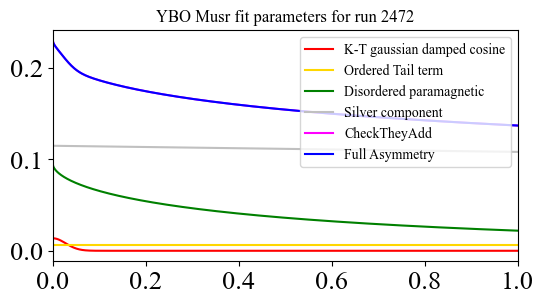

In [21]:
#code to take musrfit output file and plot the desired run's different components
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#beta_fixed_post_lock_25_009.txt
def Plot_YBO_fit_components(run_no, datafile,x_min=0,x_max=10,points=10000, colour ='b'):
    '''
    run_no: the run number from the msr file you want to plot.
    datafile: the datafile where the fit parameters are stored. This must be in the same subfolder, or use the full filepath, ensure it is a headered file exported from musrfit.
    x_min/x_max: limits in time domain (μs) of where you want to plot until
    points: number of points for the function to be plotted at, effective resolution 
    '''
    df = pd.read_csv(datafile, delim_whitespace=True)
    #print(f'headers are: {list(df)}')

    df_run = df[df['RUN']==run_no].squeeze() #to make a series not a dataframe so I can do maths on it easily when multiplying by times which is an array. squeeze makes these from series of length (1,) into scalars so there is no broadcasting errors.

    times = np.linspace(x_min,x_max, points)
    t=np.array(times)





    f_F=df_run['f_order']
    sigma=df_run['lambda_order']
    nu=df_run['field']
    phi=0
    lam_tail=df_run['lambda_tail']
    lam_para=df_run['lambda_unordered'] 
    lam_Ag=0.06          # λ_Ag     
    beta_tail=1       # β_ta   
    beta_para=0.6#df_run['YBO_paraBeta2_2461'] # β_2
    
    print(beta_para)
    beta_Ag=1
    A_T=0.23 
    Ag_F=0.5
    #Temp=df_run['dataT']
    
    A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

    phi_rad = np.pi * phi / 180

    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro


    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    #A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    A1= A_T * (1 - Ag_F) * (term1) #K-T gaussian damped cosine
    A2= A_T * (1 - Ag_F) * (term2) #Ordered Tail term
    A3= A_T * (1 - Ag_F) * (term3) #Disordered paramagnetic
    A4= A_T * Ag_F * term4 #Silver component
    A5=A1+A2+A3+A4

    plt.plot(times, A1, label='K-T gaussian damped cosine', color='r')
    plt.plot(times, A2, label='Ordered Tail term', color='gold')
    plt.plot(times, A3, label='Disordered paramagnetic', color='green')
    plt.plot(times, A4, label='Silver component', color='silver')

    plt.plot(times, A5, label='CheckTheyAdd', color='magenta')


    #plt.ylim(0,0.25)
    #plt.axhline(0.2392,color = 'r', label='Original Asy_tot')
    plt.xlim(0,1)
    plt.title(f'YBO Musr fit parameters for run {run_no}')
    plt.plot(times, A, label='Full Asymmetry', color=colour)
    
Plot_YBO_fit_components(2472, 'combined_sampleA.txt')
plt.legend()
plt.show()







RUN	f_order_err	f_order	field_err	field	lambda_order_err	lambda_order	lambda_tail_err	lambda_tail	lambda_unordered_err	lambda_unordered

In [6]:
#code to take musrfit output file and plot the desired run's different components
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#beta_fixed_post_lock_25_009.txt
def Plot_YBO_fit_components(run_no, datafile,x_min=0,x_max=10,points=10000, colour ='b'):
    '''
    run_no: the run number from the msr file you want to plot.
    datafile: the datafile where the fit parameters are stored. This must be in the same subfolder, or use the full filepath, ensure it is a headered file exported from musrfit.
    x_min/x_max: limits in time domain (μs) of where you want to plot until
    points: number of points for the function to be plotted at, effective resolution 
    '''
    df = pd.read_csv(datafile, delim_whitespace=True)
    #print(f'headers are: {list(df)}')

    df_run = df[df['RUN']==run_no].squeeze() #to make a series not a dataframe so I can do maths on it easily when multiplying by times which is an array. squeeze makes these from series of length (1,) into scalars so there is no broadcasting errors.

    times = np.linspace(x_min,x_max, points)
    t=np.array(times)

    f_F=df_run['Order_Vfrac_2461']
    sigma=df_run['YBO_sigma_2461']
    nu=df_run['Frequency_2461']
    phi=df_run['Phase']
    lam_tail=df_run['Tail_Lambda_2461']
    lam_para=df_run['YBO_paraLam2_2461'] 
    lam_Ag=df_run['Ag_Lambda']          # λ_Ag     
    beta_tail=1       # β_ta   
    beta_para=0.6#df_run['YBO_paraBeta2_2461'] # β_2
    
    print(beta_para)
    beta_Ag=1
    A_T=df_run['Asy_tot']
    Ag_F=df_run['Ag_frac']
    Temp=df_run['dataT']
    
    A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

    phi_rad = np.pi * phi / 180

    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro


    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    #A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    A1= A_T * (1 - Ag_F) * (term1) #K-T gaussian damped cosine
    A2= A_T * (1 - Ag_F) * (term2) #Ordered Tail term
    A3= A_T * (1 - Ag_F) * (term3) #Disordered paramagnetic
    A4= A_T * Ag_F * term4 #Silver component
    A5=A1+A2+A3+A4

    plt.plot(times, A1, label='K-T gaussian damped cosine', color='r')
    plt.plot(times, A2, label='Ordered Tail term', color='gold')
    plt.plot(times, A3, label='Disordered paramagnetic', color='green')
    plt.plot(times, A4, label='Silver component', color='silver')

    plt.plot(times, A5, label='CheckTheyAdd', color='magenta')


    #plt.ylim(0,0.25)
    #plt.axhline(0.2392,color = 'r', label='Original Asy_tot')
    plt.xlim(0,1)
    plt.title(f'YBO Musr fit parameters for run {run_no}, {Temp} K')
    plt.plot(times, A, label='Full Asymmetry', color=colour)
    
Plot_YBO_fit_components(2472, '15_07_25_para_newAg.txt')
plt.legend()
plt.show()







C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\4218625169.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)


FileNotFoundError: [Errno 2] No such file or directory: '15_07_25_para_newAg.txt'

<>:84: SyntaxWarning: invalid escape sequence '\s'
<>:84: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\3565679000.py:84: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path + fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\3565679000.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(dfs))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_107436\3565679000.py:84: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path + fname), sep=',\s*', engine='python') for fname in datafiles]


NameError: name 'Plot_YBO_fit_components' is not defined

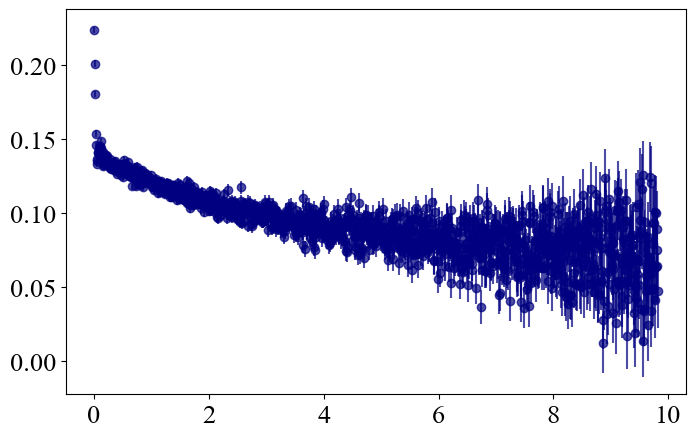

In [5]:
# This code plots each temperature: data, fit, and components in separate plots

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
import os
from PIL import Image

# Set default figure size for individual plots
plt.rcParams['figure.figsize'] = [8,5]

# Muon asymmetry model function
def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,           # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag
    beta_tail=1,     # β_tail
    beta_para=1,     # β_para
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5
):
    phi_rad = np.pi * phi / 180
    mu_gyro = 0.0135538817
    nu = nu * mu_gyro

    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)

    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4
    return A

# Path to data
path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'

# List of spectra datafiles
datafiles = [
    '2460.dat',
    '2461.dat',
    '2462.dat',
    '2463.dat',
    '2464.dat',
    '2465.dat',
    '2466.dat',
    '2467.dat',
    '2468.dat',
    '2469.dat',
    '2470.dat',
    '2471.dat',
    '2472.dat',
]

# 1 us 80 pack data
#path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'
# List of spectra datafiles
#datafiles = [
    #'2460_80pack_0_1.dat',
    #'2461_80pack_0_1.dat',
    #'2462_80pack_0_1.dat',
    #'2463_80pack_0_1.dat',
    #'2464_80pack_0_1.dat',
    #'2465_80pack_0_1.dat',
    #'2466_80pack_0_1.dat',
    #'2467_80pack_0_1.dat',
    #'2468_80pack_0_1.dat',
    #'2469_80pack_0_1.dat',
    #'2470_80pack_0_1.dat',
    #'2471_80pack_0_1.dat',
    #'2472_80pack_0_1.dat',
#]



# Load data into dataframes
dfs = [pd.read_csv((path + fname), sep=',\s*', engine='python') for fname in datafiles]

# Color map setup
cmap = cm.get_cmap('jet', len(dfs))

# Set font to Times New Roman
a = 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

# Choose parameter file and output directory
Parameter_datafile = '16_07_25_0phase_newA0Alpha.txt'

output_dir = f'{Parameter_datafile}Spectra_and_fit_plots'
os.makedirs(output_dir, exist_ok=True)

# Flag to control direction of plotting
from_start = True  # True = 2460 up, False = 2472 down

# Handle forward or reversed plotting
dfs_iter = enumerate(dfs) if from_start else enumerate(reversed(dfs))
run0 = 2460 if from_start else 2472

image_paths = []

# Determine number of files
N = len(dfs)

# Reverse loop if needed
dfs_iter = enumerate(dfs) if from_start else enumerate(reversed(dfs))
run0 = 2460 if from_start else 2472

image_paths = []

for i, df in dfs_iter:
    fig, ax = plt.subplots()

    # Calculate the correct color index
    color_index = i if from_start else (N - 1 - i)

    # Plot raw data
    x = df['xData0']
    y = df['data0']
    yerr = df['errData0']
    ax.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(color_index), alpha=0.7, zorder=1)

    # Determine run number
    run_no = run0 + i if from_start else run0 - i

    # Plot fit components with correct color
    Plot_YBO_fit_components(run_no, Parameter_datafile, colour=cmap(color_index))

    # Formatting
    ax.set_ylabel('Asymmetry', fontsize=20, weight='bold')
    ax.set_xlabel('Time (μs)', fontsize=20, weight='bold')
    ax.set_xlim(0, 1)
    ax.set_title(f'Asymmetry: Run {run_no}', fontsize=20, weight='bold')
    ax.legend(loc='upper right', fontsize=14)
    plt.tight_layout()

    # Save figure
    filename = f"asymmetry_run_{run_no}.png"
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close(fig)
    #plt.show()

    image_paths.append(filepath)



In [ ]:
from PIL import Image

# Load all images
images = [Image.open(p) for p in image_paths]

# Parameters
columns = 3
max_rows = 5
thumb_width = 600  # Resize width for each plot
spacing = 20  # Padding between plots

# Resize and store images
resized_images = [img.resize((thumb_width, int(thumb_width * img.height / img.width))) for img in images]

# Determine grid layout
n_images = len(resized_images)
rows = min(max_rows, (n_images + columns - 1) // columns)

# Find max height per row for consistent layout
columned_images = [[] for _ in range(columns)]
for idx, img in enumerate(resized_images):
    columned_images[idx % columns].append(img)

column_widths = [thumb_width] * columns
column_heights = [sum(img.height + spacing for img in col) - spacing for col in columned_images]
max_column_height = max(column_heights)

total_width = sum(column_widths) + spacing * (columns - 1)
total_height = max_column_height

# Create blank canvas
combined_image = Image.new("RGB", (total_width, total_height), color=(255, 255, 255))

# Paste images into the canvas
x_offset = 0
for col_imgs in columned_images:
    y_offset = 0
    for img in col_imgs:
        combined_image.paste(img, (x_offset, y_offset))
        y_offset += img.height + spacing
    x_offset += thumb_width + spacing

# Save final image
combined_image_path = os.path.join(output_dir, "combined_asymmetry_grid.png")
combined_image.save(combined_image_path)
